### Learning guide of deeplearning by the help of tensorflow 

Epoch 1/5


c:\Users\svish\OneDrive\Desktop\jupyter-notebook\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9276 - loss: 0.2469 - val_accuracy: 0.9727 - val_loss: 0.0979
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9683 - loss: 0.1044 - val_accuracy: 0.9720 - val_loss: 0.0948
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9772 - loss: 0.0736 - val_accuracy: 0.9732 - val_loss: 0.0950
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9823 - loss: 0.0563 - val_accuracy: 0.9765 - val_loss: 0.0919
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9858 - loss: 0.0440 - val_accuracy: 0.9760 - val_loss: 0.0841
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0800

Test Accuracy: 97.63%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Image 0: Predicted = 7, Actual = 7, Correct? True
Image 1: Predicted = 2, Actual = 2, Correct? True
Image 2: Predicted = 1, Actual = 1, Correct? True
Image 3: Predicted = 0, Actual = 0, Correct? True
Image 4: Predicted = 4, Ac

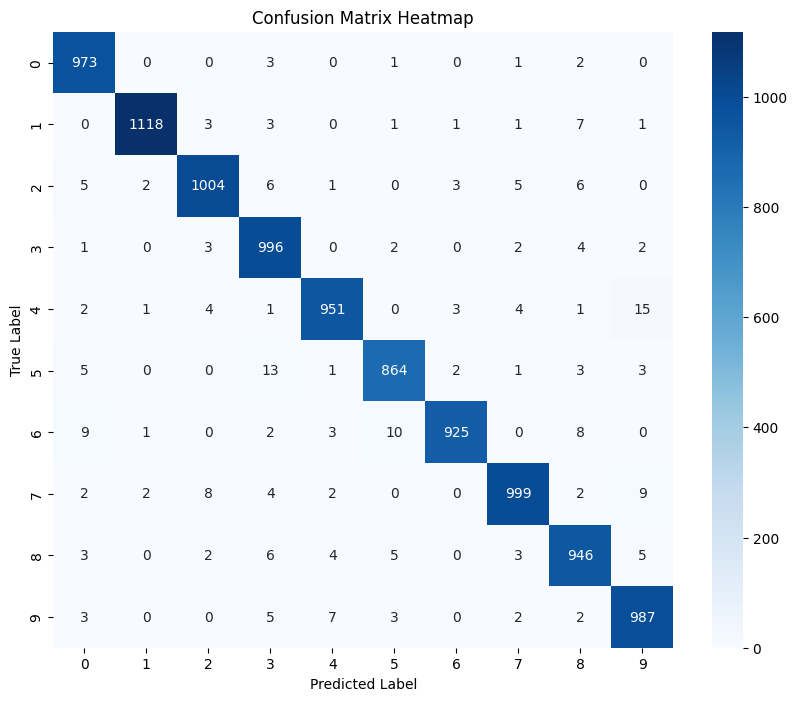

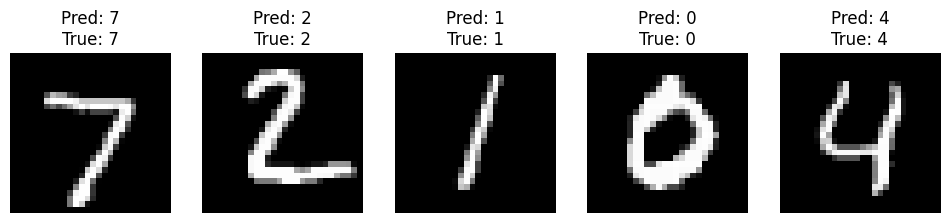

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


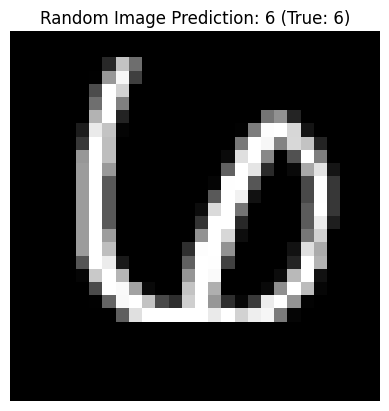

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import random

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784).astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype("float32") / 255

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(10):
    print(f"Image {i}: Predicted = {predicted_classes[i]}, Actual = {y_test[i]}, Correct? {predicted_classes[i] == y_test[i]}")

acc_score = accuracy_score(y_test, predicted_classes)
print(f"\nAccuracy Score (sklearn): {acc_score * 100:.2f}%")

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()

random_index = random.randint(0, len(x_test)-1)
random_image = x_test[random_index].reshape(1, 784)
random_prediction = np.argmax(model.predict(random_image), axis=1)[0]

plt.imshow(x_test[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Random Image Prediction: {random_prediction} (True: {y_test[random_index]})")
plt.axis('off')
plt.show()
